# Draft 1 - Figure 3

_Description of our goal:_  

Summary statistics for select regions over both obs. unc. products and all 4 GCMs + 1 OBS-LE

### Load functions and packages

In [1]:
import glob
import os

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import copy
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
def axis_breaky(axis, ypos=[0.1, 0.125], xpos=0,slant=1.5,w=0.1,zorder=3):
    d = slant  # proportion of vertical to horizontal extent of the slanted line
    anchor = (xpos,ypos[0])
    h = ypos[1] - ypos[0]

    kwargs = dict(marker=[(-d, -1), (d, 1)], markersize=12, zorder=zorder,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    axis.add_patch(Rectangle(
        anchor, width=w, height=h, fill=True, color="white",
        transform=axis.transAxes, clip_on=False, zorder=zorder)
    )
    axis.plot([0, 0], ypos, transform=axis.transAxes, **kwargs)

In [3]:
def to_png(file, filename, loc='/glade/u/home/jonahshaw/figures/',dpi=200,ext='png',**kwargs):
    '''
    Simple function for one-line saving.
    Saves to "/glade/u/home/jonahshaw/figures" by default
    '''
    output_dir = loc
    #ext = 'png'
    full_path = '%s%s.%s' % (output_dir,filename,ext)

    if not os.path.exists(output_dir + filename):
        file.savefig(full_path,format=ext, dpi=dpi,**kwargs)
#         file.clf()
        
    else:
        print('File already exists, rename or delete.')

## Load computed ToE data

In [4]:
toe_savedir = "/glade/u/home/jonahshaw/w/trend_uncertainty/nathan/ToE_output"

# spatial_masked_da = xr.open_dataarray(f"{toe_savedir}/ToE_delay.5x5.nc").drop_sel(obs="DCENT_unfilled")
# regional_masked_da = xr.open_dataarray(f"{toe_savedir}/ToE_delay.IPCCRegions.nc").drop_sel(obs="DCENT_unfilled")
obs_labels = ["GISTEMP", "HadCRUT5", "DCENT_unfilled", "BEST", "BEST_any"]
regional_masked_da = xr.open_dataarray(f"{toe_savedir}/ToE_delay.IPCCRegions.nc")
regional_masked_da["obs"] = obs_labels
regional_masked_da = regional_masked_da.sel(obs=["GISTEMP", "HadCRUT5", "BEST"])


In [5]:
# Mask the "strict" ToE values for the "BEST" dataset
out1, out2 = xr.broadcast(regional_masked_da.obs=="BEST", regional_masked_da.metric != "mean")
best_mask = out1 & out2
regional_masked_da = regional_masked_da.where(~best_mask, np.inf)

### Figure 3

/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/923430553.py:87: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/923430553.py:87: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/923430553.py:87: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the fu

Text(-0.1, 1.12, 'c.')

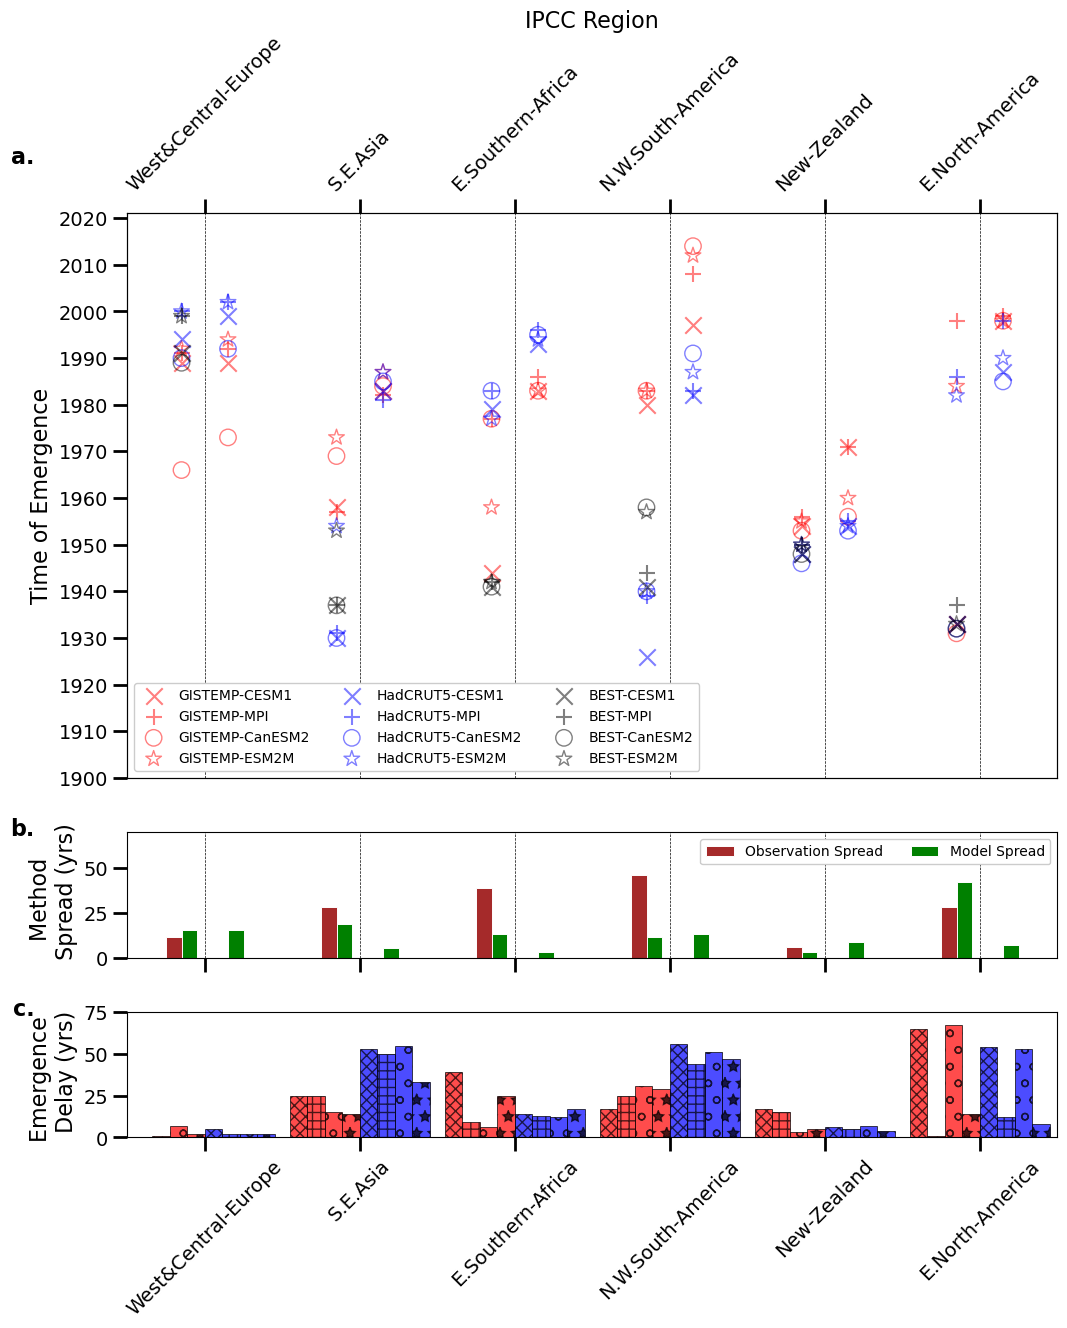

In [7]:
symbols = ['x','+','o','*','s']
hatches = ['xxx','++','o','*','--']
colors  = ['red','blue', 'black']
nan_hatch = '..' #'xx'

final_tte_ds = regional_masked_da #regional_box[0]
num_models = len(final_tte_ds.model)

# Symbols that need a fill color
fill_symbols = ['x','+',]
s_value = 140

fig = plt.figure(figsize=(12,12))

gs = gridspec.GridSpec(3,1,height_ratios=[9,2,2],figure=fig,wspace=0.05)

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1b = ax1.twiny()

# region_indices = [44,42,23,13,9]
# region_indices = [5, 42, 23, 13, 9]
region_indices = [17, 38, 26, 9, 43, 5] # Adds New Zealand
num_regions = len(region_indices)
startyear = 1900

final_tte_subset = final_tte_ds.sel(RegionIndex=region_indices)

tick_labels = []

xstats = []
for i,_index in enumerate(final_tte_subset.RegionIndex):
    xstat = i
    xstats.append(xstat)
        
    _region_subset = final_tte_subset.sel(RegionIndex=_index)
    tick_labels.append(_region_subset.RegionName.values)
    
    _mean_subset = _region_subset.sel(metric='mean')
    _strict_subset = _region_subset.sel(metric='strict')
    _delay_subset = _region_subset.sel(metric='delay')
    
    _mean_obs_spread = (_mean_subset.max(dim='obs') - _mean_subset.min(dim='obs')).mean(dim='model')#,skipna=False)
    _mean_mod_spread = (_mean_subset.max(dim='model') - _mean_subset.min(dim='model')).mean(dim='obs')
    
    _strict_obs_spread = (_strict_subset.max(dim='obs') - _strict_subset.min(dim='obs')).mean(dim='model')#,skipna=False)
    _strict_mod_spread = (_strict_subset.max(dim='model') - _strict_subset.min(dim='model')).mean(dim='obs')

    _delay_avg = (_delay_subset).mean(dim=['obs','model'])
    _delay = _delay_subset
    # _delay_avg = (_strict_subset - _mean_subset).mean(dim=['obs','model'])
    # _delay = _strict_subset - _mean_subset

    ax2.bar(xstat-0.2, _mean_obs_spread, width=0.1, color='brown', edgecolor="white", linewidth=0.7)
    ax2.bar(xstat-0.1, _mean_mod_spread, width=0.1, color='green', edgecolor="white", linewidth=0.7)
    
    ax2.bar(xstat+0.1, _strict_obs_spread, width=0.1, color='brown', edgecolor="white", linewidth=0.7)#, hatch='//')
    ax2.bar(xstat+0.2, _strict_mod_spread, width=0.1, color='green', edgecolor="white", linewidth=0.7)#, hatch='//')
    
    # Look to hide nans
    if np.isnan(_mean_obs_spread):
        ax2.bar(xstat-0.2, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_mean_mod_spread):
        ax2.bar(xstat-0.1, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_strict_obs_spread):
        ax2.bar(xstat+0.1, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_strict_mod_spread):
        ax2.bar(xstat+0.2, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    
    # These should adapt to the number of models used to estimate PIC conditions
    space_factor = 0.9 # parameter setting the blank space between IPCC regions
    ax3_width = space_factor / (2*num_models)
    _offset = (0.5 - num_models) * ax3_width
    
    for _obs,_color in zip(_mean_subset.obs,colors):

        _obs_subset = _mean_subset.sel(obs=_obs)

        for _model,_symbol,_hatch in zip(_obs_subset.model,symbols,hatches):

            _model_subset = _obs_subset.sel(model=_model)

            # print('Model: ',_model.values,'. Obs: ',_obs.values,' TTE: ',_model_subset.values)
            if (_symbol in fill_symbols):
                ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
            else:
                ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)

            if (np.isnan(_delay.sel(obs=_obs,model=_model))):
                ax3.bar(xstat+_offset, 50, 
                        width=ax3_width, color='white',edgecolor="black",
                        hatch=nan_hatch,linewidth=0.7)
            else:
                ax3.bar(xstat+_offset,_delay.sel(obs=_obs,model=_model),
                        width=ax3_width,color=_color,alpha=0.7,edgecolor="black",
                        hatch=_hatch,linewidth=0.7)
            
            # Show markers for unemerged regions
            if np.isnan(_model_subset):
                if (_symbol in fill_symbols):
                    ax1.scatter(xstat-0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
                else:
                    ax1.scatter(xstat-0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)
                    
            _offset += ax3_width

    for _obs,_color in zip(_strict_subset.obs,colors):

        _obs_subset = _strict_subset.sel(obs=_obs)

        for _model,_symbol in zip(_obs_subset.model,symbols):

            _model_subset = _obs_subset.sel(model=_model)

            if (_symbol in fill_symbols):
                ax1.scatter(xstat+0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
            else:
                ax1.scatter(xstat+0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)
        
            # Show markers for unemerged regions
            if np.isnan(_model_subset):
                if (_symbol in fill_symbols):
                    ax1.scatter(xstat+0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
                else:
                    ax1.scatter(xstat+0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)                

# Prep legend with fake plots.
for _obs,_color in zip(_strict_subset.obs,colors):

    _obs_subset = _strict_subset.sel(obs=_obs)

    for _model,_symbol in zip(_obs_subset.model,symbols):

        _model_subset = _obs_subset.sel(model=_model)
        obs_str   = str(_obs.values)
        model_str = str(_model.values)
        if (_symbol in fill_symbols):
            ax1.scatter(None,None,marker=_symbol,alpha=0.5,s=s_value,label='%s-%s' % (obs_str,model_str),facecolors=_color,edgecolors=_color)
        else:
            ax1.scatter(None,None,marker=_symbol,alpha=0.5,s=s_value,label='%s-%s' % (obs_str,model_str),facecolors='none',edgecolors=_color)
        
ax2.bar(0,0, width=0.1, color='brown', edgecolor="white", linewidth=0.7, label='Observation Spread')
ax2.bar(0,0, width=0.1, color='green', edgecolor="white", linewidth=0.7, label='Model Spread')
# ax2.bar(0,0, width=0.5, color='gray',  edgecolor="black", linewidth=0.7, alpha=0.3, label='Average Delay')
        
# ax.hlines(2020,start_idx-1,stop_idx+1,colors='black',linestyle='dashed')
ax1.vlines(xstats,ymin=startyear,ymax=2031,color='black',alpha=1,linestyle='dashed',linewidths=0.5,zorder=0)
ax2.vlines(xstats,ymin=0,ymax=70,color='black',alpha=1,linestyle='dashed',linewidths=0.5,zorder=0)

# Lower panel settings
# ax1.set_xlabel('IPCC Region',fontsize=16)
ax1.set_ylabel('Time of Emergence',fontsize=16)
ax1.set_xticks(np.arange(1,5+1))
ax1.set_xticklabels(['' for i in range(5)],fontsize=14,rotation=45)
ax1.set_yticks(np.arange(startyear, 2021, 10))
# ax1.set_yticks(np.arange(startyear, 2031, 10))
ax1.set_yticklabels([str(startyear+10*i) for i in range(len(ax1.get_yticks()))])
# ax1.set_yticklabels([str(startyear+10*i) for i in range(len(ax1.get_yticks())-1)]+['Not \n Emerged'])
ax1.set_xlim(-0.5, num_regions - 0.5)
ax1.set_ylim(startyear,2021)
ax1.tick_params(axis='x',labelsize=14,length=0,width=0)
ax1.tick_params(axis='y',labelsize=14,length=10,width=2)

ax1b.set_xticks(np.arange(0, num_regions))
ax1b.set_xticklabels(tick_labels,fontsize=14,rotation=45)
ax1b.set_xlim(-0.5, num_regions - 0.5)
ax1b.tick_params(axis='both',labelsize=14,length=10,width=2)
ax1b.set_xlabel('IPCC Region',fontsize=16)

# Upper panel settings
ax2.set_ylabel('Method \n Spread (yrs)',fontsize=16)
ax2.set_xticks(np.arange(0, num_regions))
ax2.set_xticklabels(['' for i in range(num_regions)],fontsize=14,rotation=45)
ax2.set_xlim(-0.5, num_regions - 0.5)
ax2.set_ylim(0,70)
ax2.tick_params(axis='both',labelsize=14,length=10,width=2)

# Delay panel settings
ax3.set_ylabel('Emergence \n Delay (yrs)',fontsize=16)
ax3.set_xticks(np.arange(0, num_regions))
# ax3.set_xticklabels(['' for i in range(stop_idx - start_idx + 1)],fontsize=14,rotation=45)
ax3.set_xticklabels(tick_labels,fontsize=14,rotation=45)
ax3.set_xlim(-0.5, num_regions - 0.5)
ax3.set_ylim(0,75)
ax3.tick_params(axis='both',labelsize=14,length=10,width=2)

# Axis breaks. I think it can't draw over the plot border because of gridspec
# axis_breaky(ax1, ypos=[0.935,0.955], slant=1.5,xpos=0.0,zorder=50,w=0.01)

# ax1.legend(ncol=2,loc=[0.2,0.78],fontsize=10,facecolor='white', framealpha=1)
ax1.legend(ncol=3,loc="lower left",fontsize=10,facecolor='white', framealpha=1)
ax2.legend(ncol=2,loc='best',fontsize=10,facecolor='white', framealpha=1)

# Add subplot labels
ax1.text(-0.1, 1.12, 'a.', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
ax2.text(-0.1, 1.12, 'b.', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
ax3.text(-0.1, 1.12, 'c.', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

In [8]:
to_png(file=fig,filename='TOE_comparison3_IPCCregions_coneplots',dpi=300,ext='pdf',bbox_inches='tight')

### Supplemental Figures

/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/3079165493.py:83: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/3079165493.py:83: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/3079165493.py:83: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the

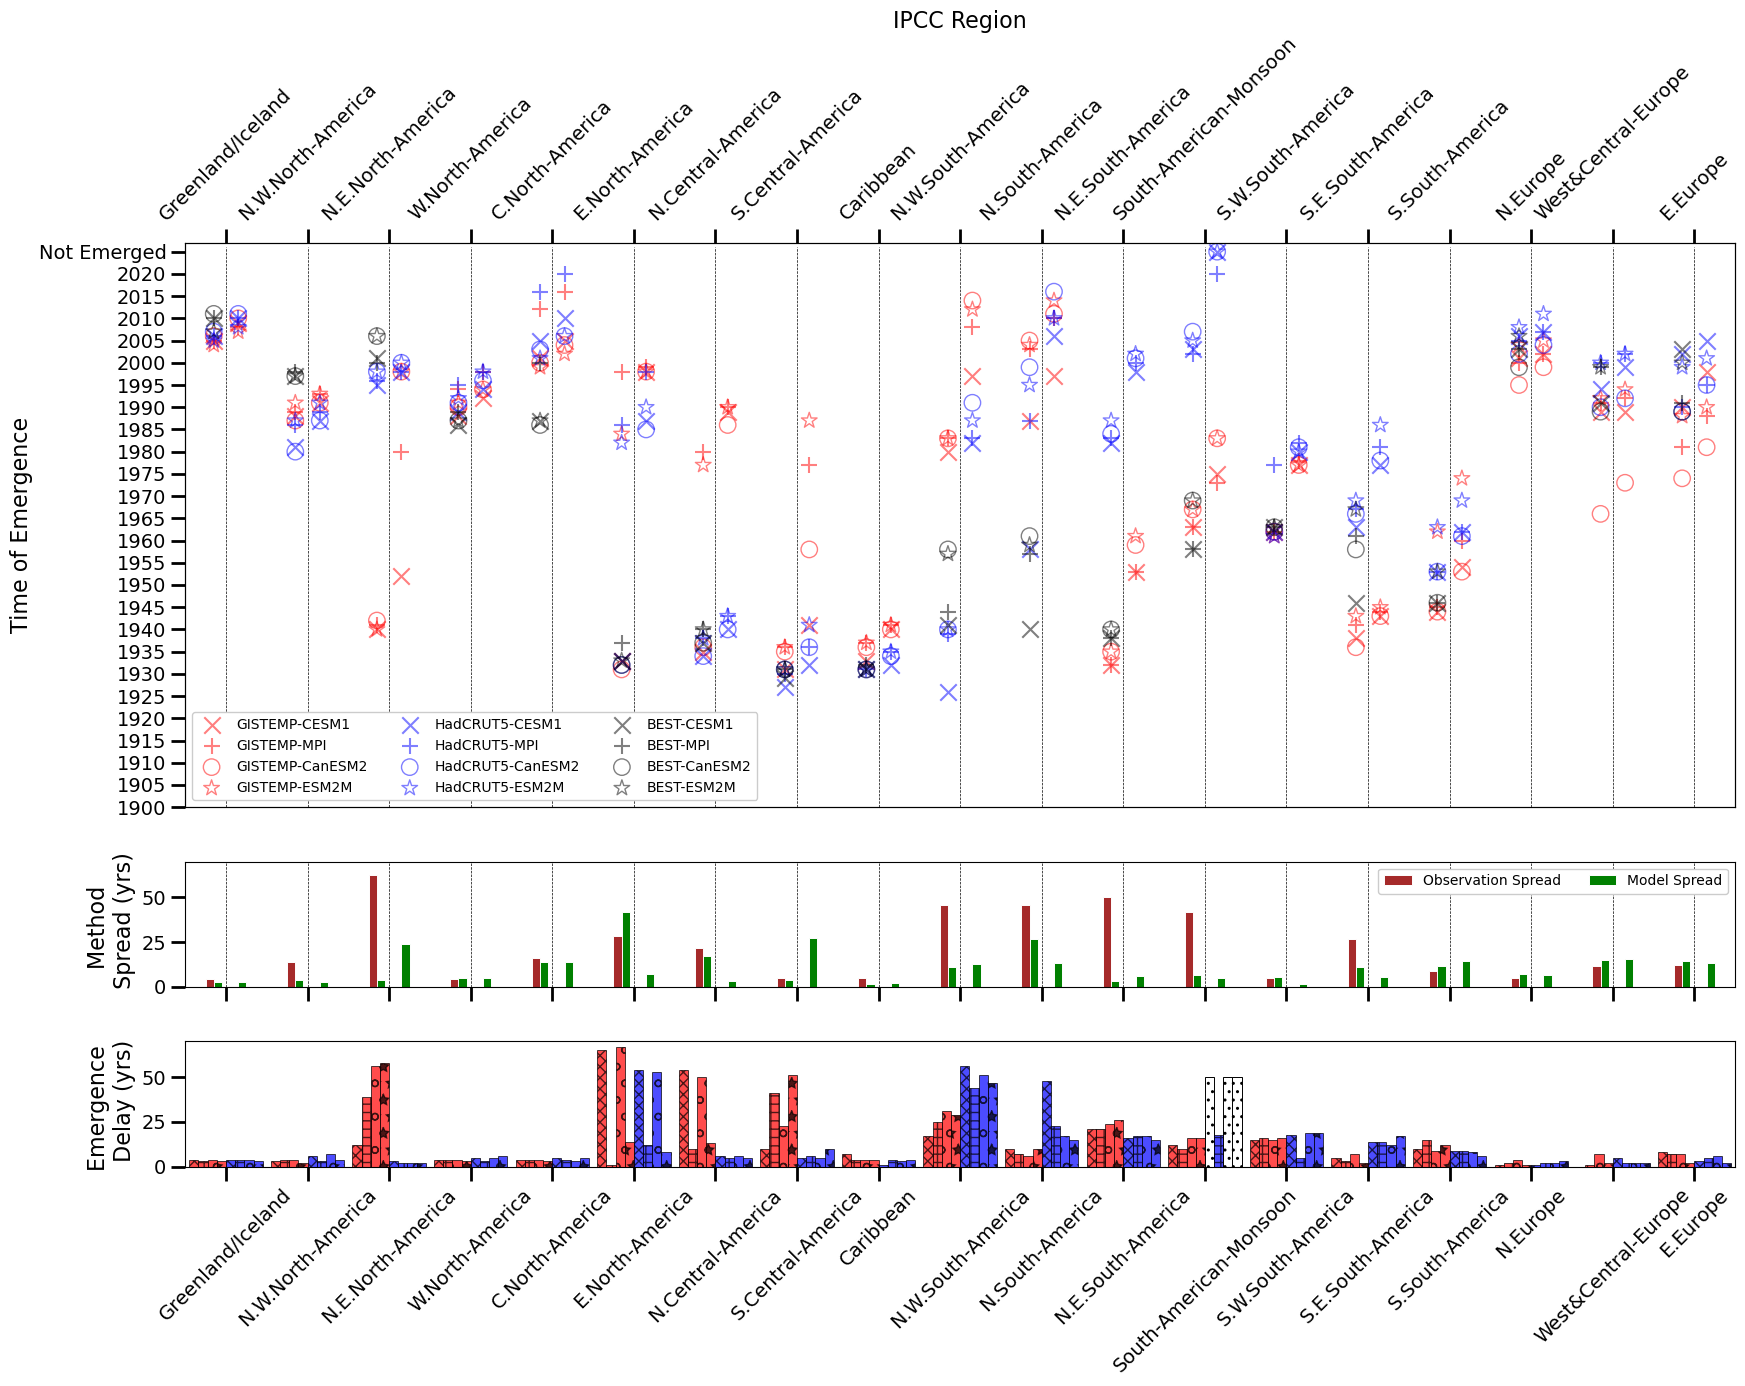

In [12]:
symbols = ['x','+','o','*','s']
hatches = ['xxx','++','o','*','--']
colors  = ['red','blue', 'black']
nan_hatch = '..' #'xx'

final_tte_ds = regional_masked_da #regional_box[0]
num_models = len(final_tte_subset.model)

# Symbols that need a fill color
fill_symbols = ['x','+',]
s_value = 140
startyear = 1900
# startyear = 1970

fig = plt.figure(figsize=(20,12))

gs = gridspec.GridSpec(3,1,height_ratios=[9,2,2],figure=fig,wspace=0.05)

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1b = ax1.twiny()

start_idx = 0
stop_idx  = 18

final_tte_subset = final_tte_ds.sel(RegionIndex=slice(start_idx,stop_idx))

tick_labels = []
xstats = []

for i,(_index,_label) in enumerate(zip(final_tte_subset.RegionIndex,final_tte_subset.RegionName)):
    xstat = i
    xstats.append(xstat)
        
    _region_subset = final_tte_subset.sel(RegionIndex=_index)
    tick_labels.append(_region_subset.RegionName.values)
    
    _mean_subset = _region_subset.sel(metric='mean')
    _strict_subset = _region_subset.sel(metric='strict')
    
    _mean_obs_spread = (_mean_subset.max(dim='obs') - _mean_subset.min(dim='obs')).mean(dim='model')#,skipna=False)
    _mean_mod_spread = (_mean_subset.max(dim='model') - _mean_subset.min(dim='model')).mean(dim='obs')
    
    _strict_obs_spread = (_strict_subset.max(dim='obs') - _strict_subset.min(dim='obs')).mean(dim='model')#,skipna=False)
    _strict_mod_spread = (_strict_subset.max(dim='model') - _strict_subset.min(dim='model')).mean(dim='obs')
    
    _delay_avg = (_strict_subset - _mean_subset).mean(dim=['obs','model'])
    _delay = _strict_subset - _mean_subset   

    ax2.bar(xstat-0.2, _mean_obs_spread, width=0.1, color='brown', edgecolor="white", linewidth=0.7)
    ax2.bar(xstat-0.1, _mean_mod_spread, width=0.1, color='green', edgecolor="white", linewidth=0.7)
    
    ax2.bar(xstat+0.1, _strict_obs_spread, width=0.1, color='brown', edgecolor="white", linewidth=0.7)#, hatch='//')
    ax2.bar(xstat+0.2, _strict_mod_spread, width=0.1, color='green', edgecolor="white", linewidth=0.7)#, hatch='//')
    
    # Look to hide nans
    if np.isnan(_mean_obs_spread):
        ax2.bar(xstat-0.2, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_mean_mod_spread):
        ax2.bar(xstat-0.1, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_strict_obs_spread):
        ax2.bar(xstat+0.1, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_strict_mod_spread):
        ax2.bar(xstat+0.2, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    
    # These should adapt to the number of models used to estimate PIC conditions    
    space_factor = 0.9 # parameter setting the blank space between IPCC regions
    ax3_width = space_factor / (2*num_models)
    _offset = (0.5 - num_models) * ax3_width

    for _obs,_color in zip(_mean_subset.obs,colors):

        _obs_subset = _mean_subset.sel(obs=_obs)

        for _model,_symbol,_hatch in zip(_obs_subset.model,symbols,hatches):

            _model_subset = _obs_subset.sel(model=_model)

            # print('Model: ',_model.values,'. Obs: ',_obs.values,' TTE: ',_model_subset.values)
            if (_symbol in fill_symbols):
                ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
            else:
                ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)
                
            if (np.isnan(_delay.sel(obs=_obs,model=_model))):
                ax3.bar(xstat+_offset, 50, 
                        width=ax3_width, color='white',edgecolor="black",
                        hatch=nan_hatch,linewidth=0.7)
            else:
                ax3.bar(xstat+_offset,_delay.sel(obs=_obs,model=_model),
                        width=ax3_width,color=_color,alpha=0.7,edgecolor="black",
                        hatch=_hatch,linewidth=0.7)
            
            # Show markers for unemerged regions
            if np.isnan(_model_subset):
                if (_symbol in fill_symbols):
                    ax1.scatter(xstat-0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
                else:
                    ax1.scatter(xstat-0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)
                    
            _offset += ax3_width

    for _obs,_color in zip(_strict_subset.obs,colors):

        _obs_subset = _strict_subset.sel(obs=_obs)

        for _model,_symbol in zip(_obs_subset.model,symbols):

            _model_subset = _obs_subset.sel(model=_model)

            if (_symbol in fill_symbols):
                ax1.scatter(xstat+0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
            else:
                ax1.scatter(xstat+0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)
        
            # Show markers for unemerged regions
            if np.isnan(_model_subset):
                if (_symbol in fill_symbols):
                    ax1.scatter(xstat+0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
                else:
                    ax1.scatter(xstat+0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)                

# Prep legend with fake plots.
for _obs,_color in zip(_strict_subset.obs,colors):

    _obs_subset = _strict_subset.sel(obs=_obs)

    for _model,_symbol in zip(_obs_subset.model,symbols):

        _model_subset = _obs_subset.sel(model=_model)
        obs_str   = str(_obs.values)
        model_str = str(_model.values)
        if (_symbol in fill_symbols):
            ax1.scatter(None,None,marker=_symbol,alpha=0.5,s=s_value,label='%s-%s' % (obs_str,model_str),facecolors=_color,edgecolors=_color)
        else:
            ax1.scatter(None,None,marker=_symbol,alpha=0.5,s=s_value,label='%s-%s' % (obs_str,model_str),facecolors='none',edgecolors=_color)
        
ax2.bar(0,0, width=0.1, color='brown', edgecolor="white", linewidth=0.7, label='Observation Spread')
ax2.bar(0,0, width=0.1, color='green', edgecolor="white", linewidth=0.7, label='Model Spread')
# ax2.bar(0,0, width=0.5, color='gray',  edgecolor="black", linewidth=0.7, alpha=0.3, label='Average Delay')
        
# ax.hlines(2020,start_idx-1,stop_idx+1,colors='black',linestyle='dashed')
ax1.vlines(xstats,ymin=startyear,ymax=2026,color='black',alpha=1,linestyle='dashed',linewidths=0.5,zorder=0)
ax2.vlines(xstats,ymin=0,ymax=70,color='black',alpha=1,linestyle='dashed',linewidths=0.5,zorder=0)

# Lower panel settings
# ax1.set_xlabel('IPCC Region',fontsize=16)
ax1.set_ylabel('Time of Emergence',fontsize=16)
# ax1.set_xticks(np.arange(1,5+1))
ax1b.set_xticks(np.arange(len(tick_labels)))
ax1.set_xticklabels(['' for i in range(len(tick_labels))],fontsize=14,rotation=45)
ax1.set_yticks(np.arange(startyear,2026,5))
ax1.set_yticklabels([str(startyear+5*i) for i in range(len(ax1.get_yticks())-1)]+['Not Emerged'])
# ax1.set_xlim(-0.5,4.5)
ax1.set_xlim(-0.5,len(tick_labels)-0.5)
ax1.set_ylim(startyear,2027)
ax1.tick_params(axis='x',labelsize=14,length=0,width=0)
ax1.tick_params(axis='y',labelsize=14,length=10,width=2)

# ax1b.set_xticks(np.arange(0,5))
ax1b.set_xticks(np.arange(len(tick_labels)))
ax1b.set_xticklabels(tick_labels,fontsize=14,rotation=45)
# ax1b.set_xlim(-0.5,4.5)
ax1b.set_xlim(-0.5,len(tick_labels)-0.5)
ax1b.tick_params(axis='both',labelsize=14,length=10,width=2)
ax1b.set_xlabel('IPCC Region',fontsize=16)

# Upper panel settings
ax2.set_ylabel('Method \n Spread (yrs)',fontsize=16)
# ax2.set_xticks(np.arange(0,5))
ax2.set_xticks(np.arange(len(tick_labels)))
ax2.set_xticklabels(['' for i in range(len(tick_labels))],fontsize=14,rotation=45)
# ax2.set_xticklabels(['' for i in range(5)],fontsize=14,rotation=45)
ax2.set_xlim(-0.5,len(tick_labels)-0.5)
ax2.set_ylim(0,70)
ax2.tick_params(axis='both',labelsize=14,length=10,width=2)

# Delay panel settings
ax3.set_ylabel('Emergence \n Delay (yrs)',fontsize=16)
ax3.set_xticks(np.arange(len(tick_labels)))
# ax3.set_xticks(np.arange(0,5))
# ax3.set_xticklabels(['' for i in range(stop_idx - start_idx + 1)],fontsize=14,rotation=45)
ax3.set_xticklabels(tick_labels,fontsize=14,rotation=45)
ax3.set_xlim(-0.5,len(tick_labels)-0.5)
# ax3.set_xlim(-0.5,4.5)
ax3.set_ylim(0,70)
ax3.tick_params(axis='both',labelsize=14,length=10,width=2)

# Axis breaks. I think it can't draw over the plot border because of gridspec
# axis_breaky(ax1, ypos=[0.935,0.955], slant=1.5,xpos=0.0,zorder=50,w=0.01)

ax1.legend(ncol=3,loc='best',fontsize=10,facecolor='white', framealpha=1)
ax2.legend(ncol=2,loc='best',fontsize=10,facecolor='white', framealpha=1)

In [13]:
to_png(file=fig,filename='TOE_comparison2_IPCCregions_0_18',dpi=300,ext='pdf',bbox_inches='tight')

/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/1836729168.py:83: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/1836729168.py:83: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/1836729168.py:83: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the

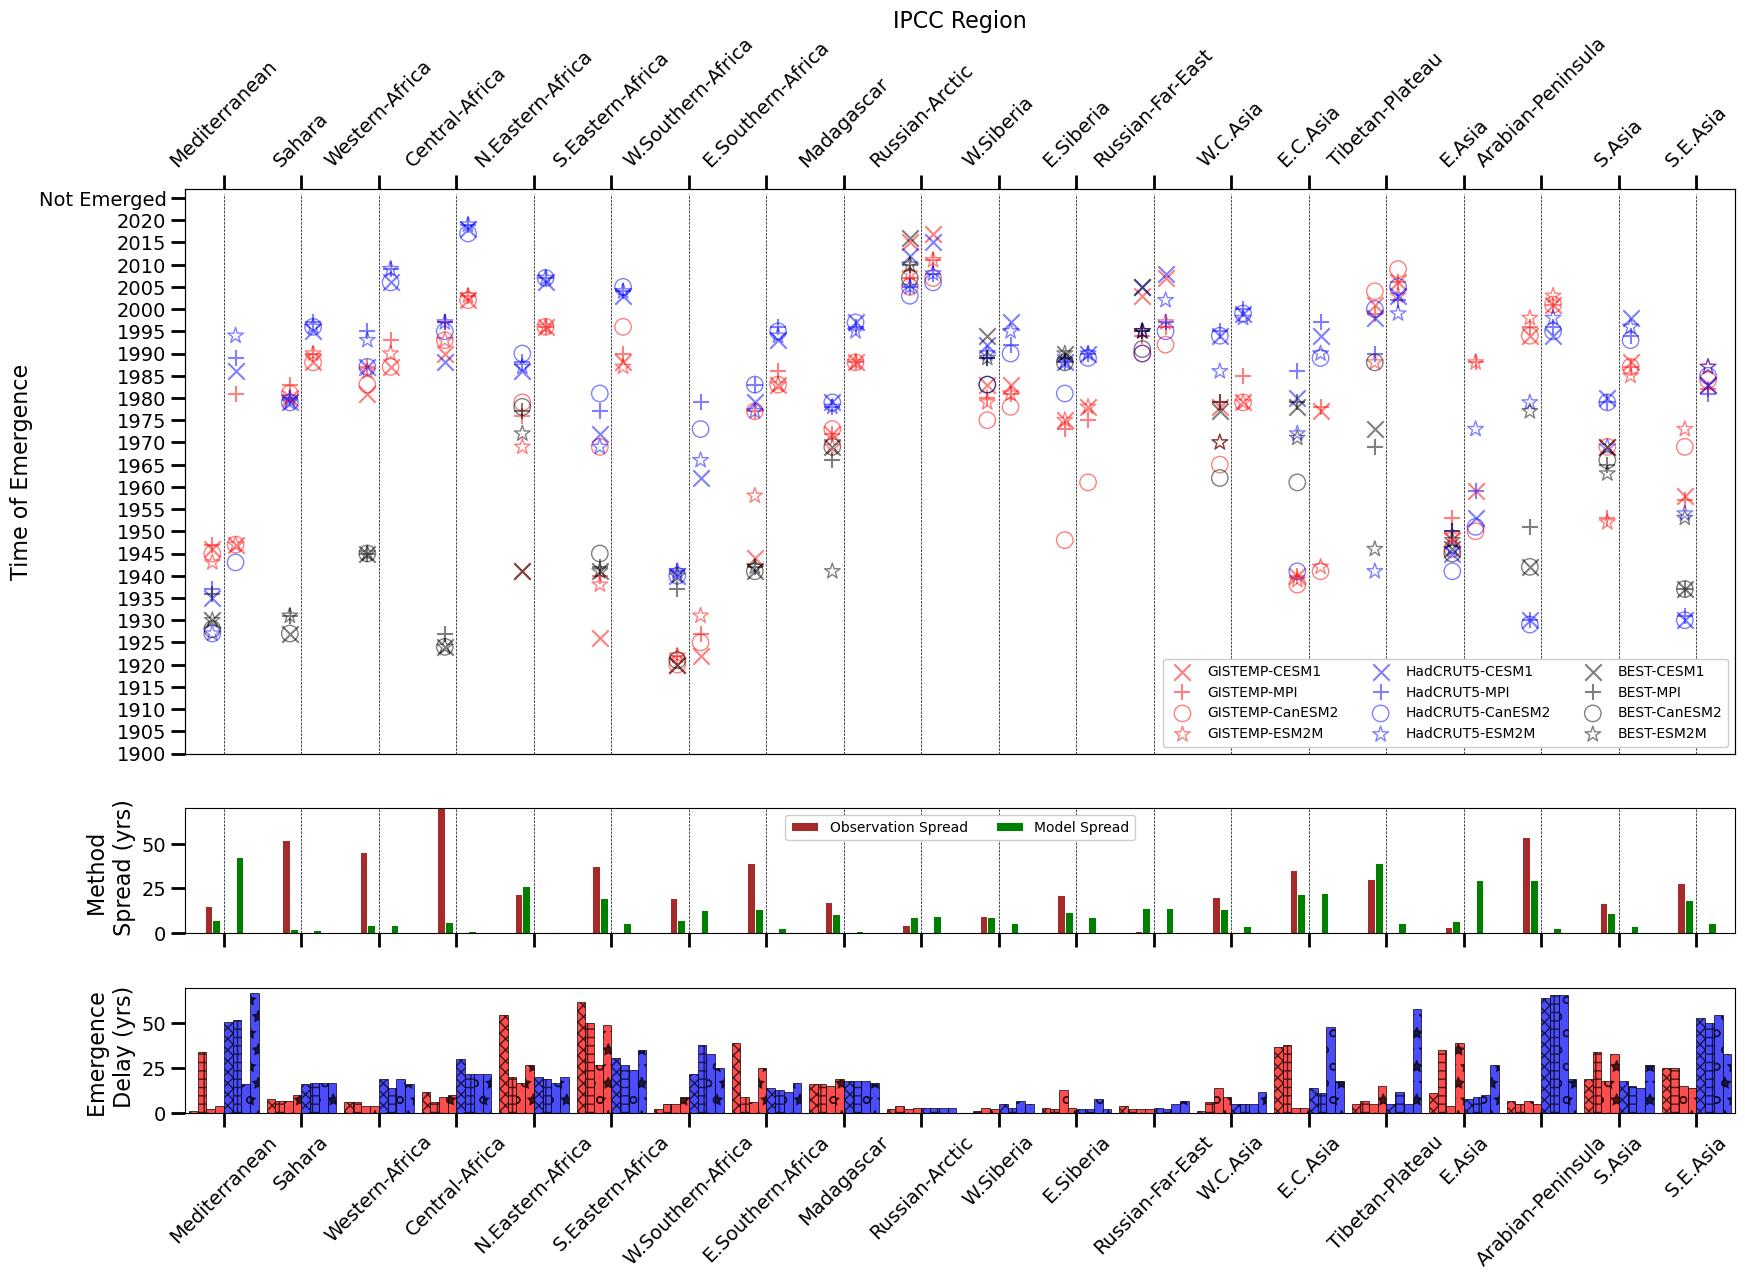

In [15]:
symbols = ['x','+','o','*','s']
hatches = ['xxx','++','o','*','--']
colors  = ['red','blue', 'black']
nan_hatch = '..' #'xx'

final_tte_ds = regional_masked_da #regional_box[0]
num_models = len(final_tte_subset.model)

# Symbols that need a fill color
fill_symbols = ['x','+',]
s_value = 140
startyear = 1900
# startyear = 1970

fig = plt.figure(figsize=(20,12))

gs = gridspec.GridSpec(3,1,height_ratios=[9,2,2],figure=fig,wspace=0.05)

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1b = ax1.twiny()

start_idx = 19
stop_idx  = 38

final_tte_subset = final_tte_ds.sel(RegionIndex=slice(start_idx,stop_idx))

tick_labels = []
xstats = []

for i,(_index,_label) in enumerate(zip(final_tte_subset.RegionIndex,final_tte_subset.RegionName)):
    xstat = i
    xstats.append(xstat)
        
    _region_subset = final_tte_subset.sel(RegionIndex=_index)
    tick_labels.append(_region_subset.RegionName.values)
    
    _mean_subset = _region_subset.sel(metric='mean')
    _strict_subset = _region_subset.sel(metric='strict')
    
    _mean_obs_spread = (_mean_subset.max(dim='obs') - _mean_subset.min(dim='obs')).mean(dim='model')#,skipna=False)
    _mean_mod_spread = (_mean_subset.max(dim='model') - _mean_subset.min(dim='model')).mean(dim='obs')
    
    _strict_obs_spread = (_strict_subset.max(dim='obs') - _strict_subset.min(dim='obs')).mean(dim='model')#,skipna=False)
    _strict_mod_spread = (_strict_subset.max(dim='model') - _strict_subset.min(dim='model')).mean(dim='obs')
    
    _delay_avg = (_strict_subset - _mean_subset).mean(dim=['obs','model'])
    _delay = _strict_subset - _mean_subset   

    ax2.bar(xstat-0.2, _mean_obs_spread, width=0.1, color='brown', edgecolor="white", linewidth=0.7)
    ax2.bar(xstat-0.1, _mean_mod_spread, width=0.1, color='green', edgecolor="white", linewidth=0.7)
    
    ax2.bar(xstat+0.1, _strict_obs_spread, width=0.1, color='brown', edgecolor="white", linewidth=0.7)#, hatch='//')
    ax2.bar(xstat+0.2, _strict_mod_spread, width=0.1, color='green', edgecolor="white", linewidth=0.7)#, hatch='//')
    
    # Look to hide nans
    if np.isnan(_mean_obs_spread):
        ax2.bar(xstat-0.2, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_mean_mod_spread):
        ax2.bar(xstat-0.1, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_strict_obs_spread):
        ax2.bar(xstat+0.1, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_strict_mod_spread):
        ax2.bar(xstat+0.2, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    
    # These should adapt to the number of models used to estimate PIC conditions    
    space_factor = 0.9 # parameter setting the blank space between IPCC regions
    ax3_width = space_factor / (2*num_models)
    _offset = (0.5 - num_models) * ax3_width

    for _obs,_color in zip(_mean_subset.obs,colors):

        _obs_subset = _mean_subset.sel(obs=_obs)

        for _model,_symbol,_hatch in zip(_obs_subset.model,symbols,hatches):

            _model_subset = _obs_subset.sel(model=_model)

            # print('Model: ',_model.values,'. Obs: ',_obs.values,' TTE: ',_model_subset.values)
            if (_symbol in fill_symbols):
                ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
            else:
                ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)
                
            if (np.isnan(_delay.sel(obs=_obs,model=_model))):
                ax3.bar(xstat+_offset, 50, 
                        width=ax3_width, color='white',edgecolor="black",
                        hatch=nan_hatch,linewidth=0.7)
            else:
                ax3.bar(xstat+_offset,_delay.sel(obs=_obs,model=_model),
                        width=ax3_width,color=_color,alpha=0.7,edgecolor="black",
                        hatch=_hatch,linewidth=0.7)
            
            # Show markers for unemerged regions
            if np.isnan(_model_subset):
                if (_symbol in fill_symbols):
                    ax1.scatter(xstat-0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
                else:
                    ax1.scatter(xstat-0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)
                    
            _offset += ax3_width

    for _obs,_color in zip(_strict_subset.obs,colors):

        _obs_subset = _strict_subset.sel(obs=_obs)

        for _model,_symbol in zip(_obs_subset.model,symbols):

            _model_subset = _obs_subset.sel(model=_model)

            if (_symbol in fill_symbols):
                ax1.scatter(xstat+0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
            else:
                ax1.scatter(xstat+0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)
        
            # Show markers for unemerged regions
            if np.isnan(_model_subset):
                if (_symbol in fill_symbols):
                    ax1.scatter(xstat+0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
                else:
                    ax1.scatter(xstat+0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)                

# Prep legend with fake plots.
for _obs,_color in zip(_strict_subset.obs,colors):

    _obs_subset = _strict_subset.sel(obs=_obs)

    for _model,_symbol in zip(_obs_subset.model,symbols):

        _model_subset = _obs_subset.sel(model=_model)
        obs_str   = str(_obs.values)
        model_str = str(_model.values)
        if (_symbol in fill_symbols):
            ax1.scatter(None,None,marker=_symbol,alpha=0.5,s=s_value,label='%s-%s' % (obs_str,model_str),facecolors=_color,edgecolors=_color)
        else:
            ax1.scatter(None,None,marker=_symbol,alpha=0.5,s=s_value,label='%s-%s' % (obs_str,model_str),facecolors='none',edgecolors=_color)
        
ax2.bar(0,0, width=0.1, color='brown', edgecolor="white", linewidth=0.7, label='Observation Spread')
ax2.bar(0,0, width=0.1, color='green', edgecolor="white", linewidth=0.7, label='Model Spread')
# ax2.bar(0,0, width=0.5, color='gray',  edgecolor="black", linewidth=0.7, alpha=0.3, label='Average Delay')
        
# ax.hlines(2020,start_idx-1,stop_idx+1,colors='black',linestyle='dashed')
ax1.vlines(xstats,ymin=startyear,ymax=2026,color='black',alpha=1,linestyle='dashed',linewidths=0.5,zorder=0)
ax2.vlines(xstats,ymin=0,ymax=70,color='black',alpha=1,linestyle='dashed',linewidths=0.5,zorder=0)

# Lower panel settings
# ax1.set_xlabel('IPCC Region',fontsize=16)
ax1.set_ylabel('Time of Emergence',fontsize=16)
# ax1.set_xticks(np.arange(1,5+1))
ax1b.set_xticks(np.arange(len(tick_labels)))
ax1.set_xticklabels(['' for i in range(len(tick_labels))],fontsize=14,rotation=45)
ax1.set_yticks(np.arange(startyear,2026,5))
ax1.set_yticklabels([str(startyear+5*i) for i in range(len(ax1.get_yticks())-1)]+['Not Emerged'])
# ax1.set_xlim(-0.5,4.5)
ax1.set_xlim(-0.5,len(tick_labels)-0.5)
ax1.set_ylim(startyear,2027)
ax1.tick_params(axis='x',labelsize=14,length=0,width=0)
ax1.tick_params(axis='y',labelsize=14,length=10,width=2)

# ax1b.set_xticks(np.arange(0,5))
ax1b.set_xticks(np.arange(len(tick_labels)))
ax1b.set_xticklabels(tick_labels,fontsize=14,rotation=45)
# ax1b.set_xlim(-0.5,4.5)
ax1b.set_xlim(-0.5,len(tick_labels)-0.5)
ax1b.tick_params(axis='both',labelsize=14,length=10,width=2)
ax1b.set_xlabel('IPCC Region',fontsize=16)

# Upper panel settings
ax2.set_ylabel('Method \n Spread (yrs)',fontsize=16)
# ax2.set_xticks(np.arange(0,5))
ax2.set_xticks(np.arange(len(tick_labels)))
ax2.set_xticklabels(['' for i in range(len(tick_labels))],fontsize=14,rotation=45)
# ax2.set_xticklabels(['' for i in range(5)],fontsize=14,rotation=45)
ax2.set_xlim(-0.5,len(tick_labels)-0.5)
ax2.set_ylim(0,70)
ax2.tick_params(axis='both',labelsize=14,length=10,width=2)

# Delay panel settings
ax3.set_ylabel('Emergence \n Delay (yrs)',fontsize=16)
ax3.set_xticks(np.arange(len(tick_labels)))
# ax3.set_xticks(np.arange(0,5))
# ax3.set_xticklabels(['' for i in range(stop_idx - start_idx + 1)],fontsize=14,rotation=45)
ax3.set_xticklabels(tick_labels,fontsize=14,rotation=45)
ax3.set_xlim(-0.5,len(tick_labels)-0.5)
# ax3.set_xlim(-0.5,4.5)
ax3.set_ylim(0,70)
ax3.tick_params(axis='both',labelsize=14,length=10,width=2)

# Axis breaks. I think it can't draw over the plot border because of gridspec
# axis_breaky(ax1, ypos=[0.935,0.955], slant=1.5,xpos=0.0,zorder=50,w=0.01)

ax1.legend(ncol=3,loc='best',fontsize=10,facecolor='white', framealpha=1)
ax2.legend(ncol=2,loc='best',fontsize=10,facecolor='white', framealpha=1)

In [16]:
to_png(file=fig,filename='TOE_comparison2_IPCCregions_19_38',dpi=300,ext='pdf',bbox_inches='tight')

/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/59207987.py:83: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/59207987.py:83: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
/glade/derecho/scratch/jonahshaw/tmp/ipykernel_14923/59207987.py:83: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the futur

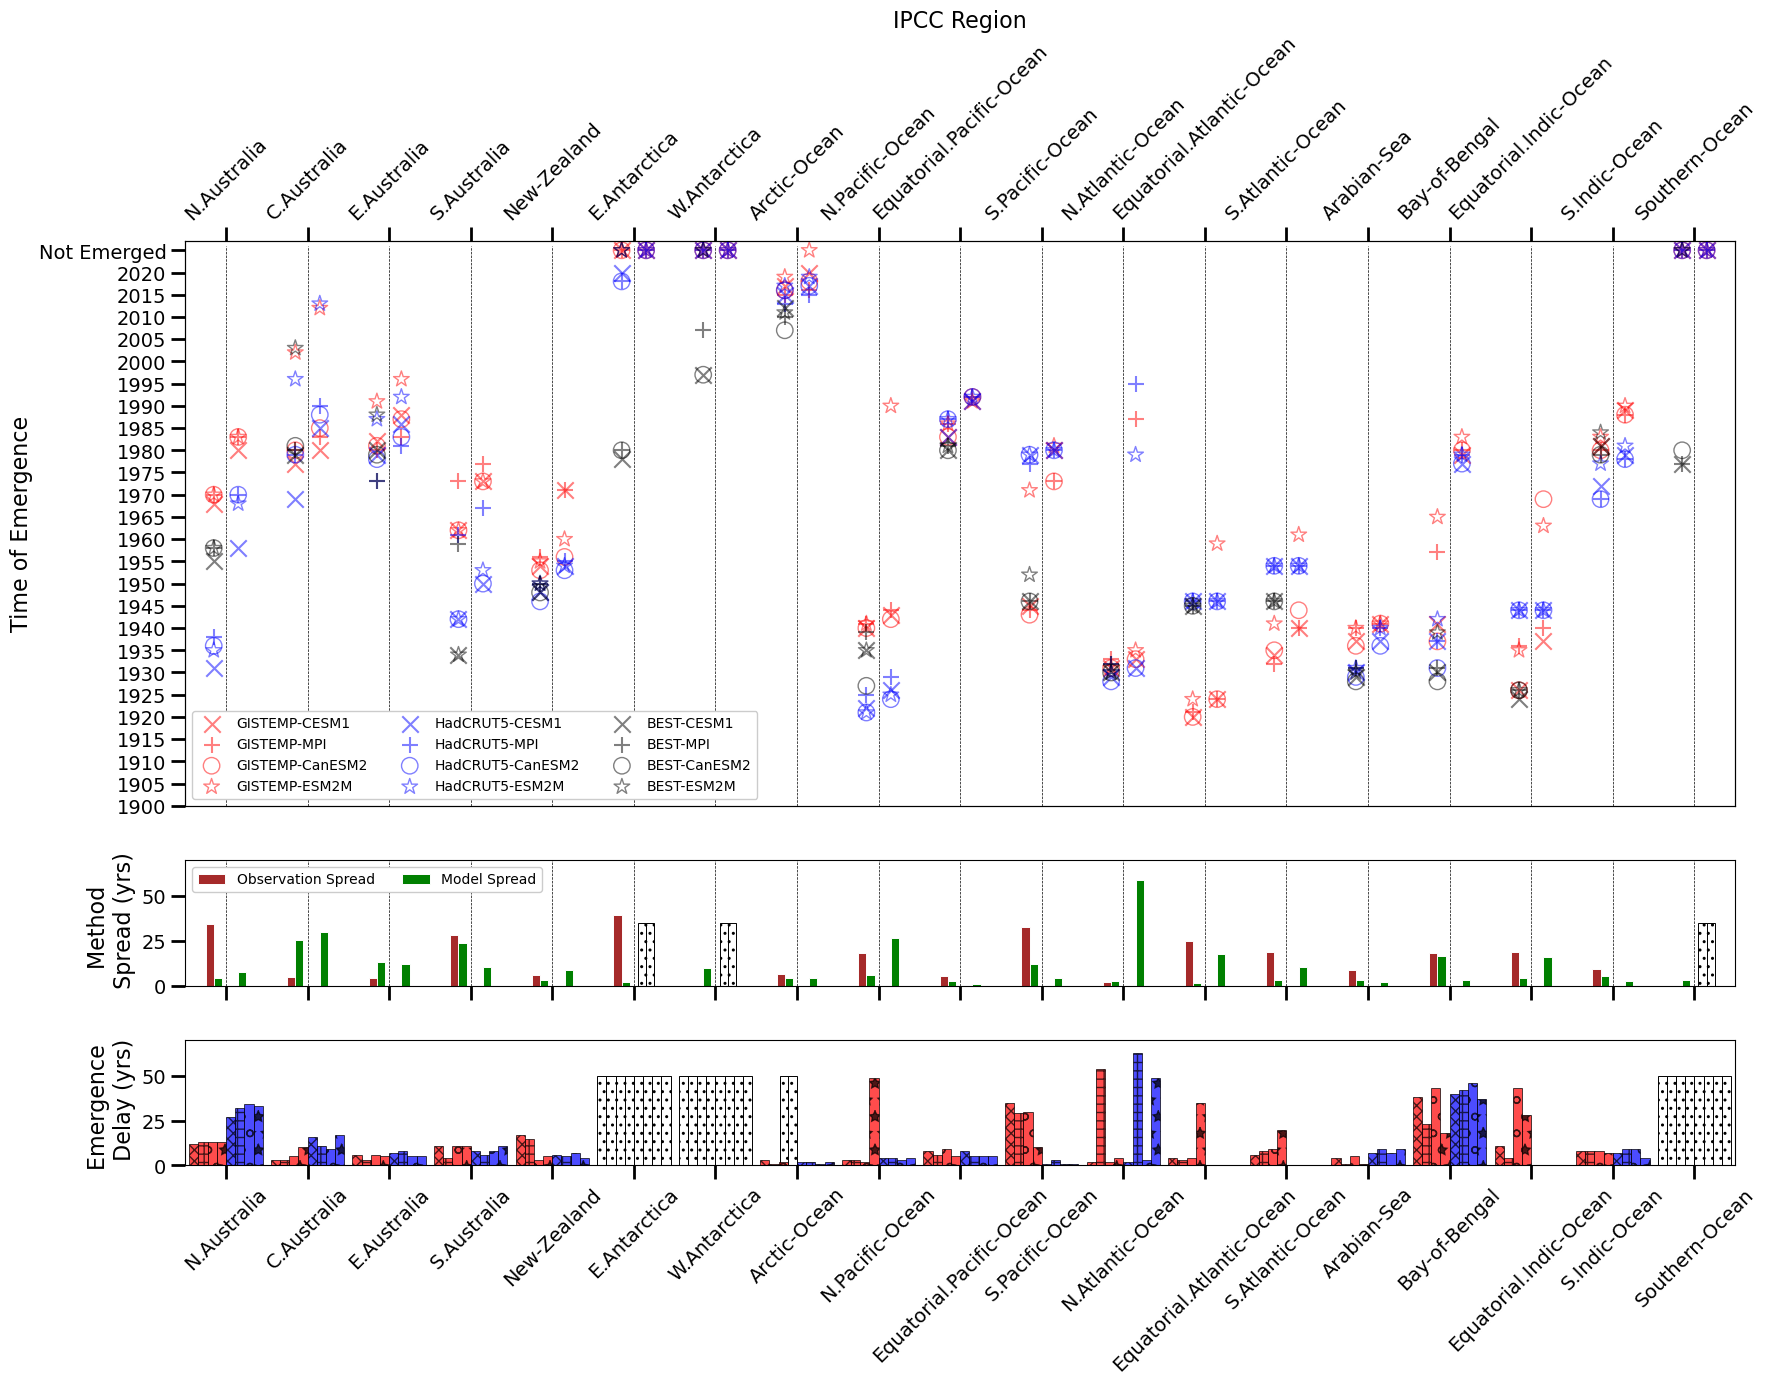

In [17]:
symbols = ['x','+','o','*','s']
hatches = ['xxx','++','o','*','--']
colors  = ['red','blue', 'black']
nan_hatch = '..' #'xx'

final_tte_ds = regional_masked_da #regional_box[0]
num_models = len(final_tte_subset.model)

# Symbols that need a fill color
fill_symbols = ['x','+',]
s_value = 140
startyear = 1900
# startyear = 1970

fig = plt.figure(figsize=(20,12))

gs = gridspec.GridSpec(3,1,height_ratios=[9,2,2],figure=fig,wspace=0.05)

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1b = ax1.twiny()

start_idx = 39
stop_idx  = 57

final_tte_subset = final_tte_ds.sel(RegionIndex=slice(start_idx,stop_idx))

tick_labels = []
xstats = []

for i,(_index,_label) in enumerate(zip(final_tte_subset.RegionIndex,final_tte_subset.RegionName)):
    xstat = i
    xstats.append(xstat)
        
    _region_subset = final_tte_subset.sel(RegionIndex=_index)
    tick_labels.append(_region_subset.RegionName.values)
    
    _mean_subset = _region_subset.sel(metric='mean')
    _strict_subset = _region_subset.sel(metric='strict')
    
    _mean_obs_spread = (_mean_subset.max(dim='obs') - _mean_subset.min(dim='obs')).mean(dim='model')#,skipna=False)
    _mean_mod_spread = (_mean_subset.max(dim='model') - _mean_subset.min(dim='model')).mean(dim='obs')
    
    _strict_obs_spread = (_strict_subset.max(dim='obs') - _strict_subset.min(dim='obs')).mean(dim='model')#,skipna=False)
    _strict_mod_spread = (_strict_subset.max(dim='model') - _strict_subset.min(dim='model')).mean(dim='obs')
    
    _delay_avg = (_strict_subset - _mean_subset).mean(dim=['obs','model'])
    _delay = _strict_subset - _mean_subset   

    ax2.bar(xstat-0.2, _mean_obs_spread, width=0.1, color='brown', edgecolor="white", linewidth=0.7)
    ax2.bar(xstat-0.1, _mean_mod_spread, width=0.1, color='green', edgecolor="white", linewidth=0.7)
    
    ax2.bar(xstat+0.1, _strict_obs_spread, width=0.1, color='brown', edgecolor="white", linewidth=0.7)#, hatch='//')
    ax2.bar(xstat+0.2, _strict_mod_spread, width=0.1, color='green', edgecolor="white", linewidth=0.7)#, hatch='//')
    
    # Look to hide nans
    if np.isnan(_mean_obs_spread):
        ax2.bar(xstat-0.2, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_mean_mod_spread):
        ax2.bar(xstat-0.1, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_strict_obs_spread):
        ax2.bar(xstat+0.1, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    if np.isnan(_strict_mod_spread):
        ax2.bar(xstat+0.2, 35, width=0.1, color='white', edgecolor="black", linewidth=0.7,hatch=nan_hatch)
    
    # These should adapt to the number of models used to estimate PIC conditions    
    space_factor = 0.9 # parameter setting the blank space between IPCC regions
    ax3_width = space_factor / (2*num_models)
    _offset = (0.5 - num_models) * ax3_width

    for _obs,_color in zip(_mean_subset.obs,colors):

        _obs_subset = _mean_subset.sel(obs=_obs)

        for _model,_symbol,_hatch in zip(_obs_subset.model,symbols,hatches):

            _model_subset = _obs_subset.sel(model=_model)

            # print('Model: ',_model.values,'. Obs: ',_obs.values,' TTE: ',_model_subset.values)
            if (_symbol in fill_symbols):
                ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
            else:
                ax1.scatter(xstat-0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)
                
            if (np.isnan(_delay.sel(obs=_obs,model=_model))):
                ax3.bar(xstat+_offset, 50, 
                        width=ax3_width, color='white',edgecolor="black",
                        hatch=nan_hatch,linewidth=0.7)
            else:
                ax3.bar(xstat+_offset,_delay.sel(obs=_obs,model=_model),
                        width=ax3_width,color=_color,alpha=0.7,edgecolor="black",
                        hatch=_hatch,linewidth=0.7)
            
            # Show markers for unemerged regions
            if np.isnan(_model_subset):
                if (_symbol in fill_symbols):
                    ax1.scatter(xstat-0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
                else:
                    ax1.scatter(xstat-0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)
                    
            _offset += ax3_width

    for _obs,_color in zip(_strict_subset.obs,colors):

        _obs_subset = _strict_subset.sel(obs=_obs)

        for _model,_symbol in zip(_obs_subset.model,symbols):

            _model_subset = _obs_subset.sel(model=_model)

            if (_symbol in fill_symbols):
                ax1.scatter(xstat+0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
            else:
                ax1.scatter(xstat+0.15,_model_subset,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)
        
            # Show markers for unemerged regions
            if np.isnan(_model_subset):
                if (_symbol in fill_symbols):
                    ax1.scatter(xstat+0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors=_color,edgecolors=_color)
                else:
                    ax1.scatter(xstat+0.15,2025,marker=_symbol,alpha=0.5,s=s_value,facecolors='none',edgecolors=_color)                

# Prep legend with fake plots.
for _obs,_color in zip(_strict_subset.obs,colors):

    _obs_subset = _strict_subset.sel(obs=_obs)

    for _model,_symbol in zip(_obs_subset.model,symbols):

        _model_subset = _obs_subset.sel(model=_model)
        obs_str   = str(_obs.values)
        model_str = str(_model.values)
        if (_symbol in fill_symbols):
            ax1.scatter(None,None,marker=_symbol,alpha=0.5,s=s_value,label='%s-%s' % (obs_str,model_str),facecolors=_color,edgecolors=_color)
        else:
            ax1.scatter(None,None,marker=_symbol,alpha=0.5,s=s_value,label='%s-%s' % (obs_str,model_str),facecolors='none',edgecolors=_color)
        
ax2.bar(0,0, width=0.1, color='brown', edgecolor="white", linewidth=0.7, label='Observation Spread')
ax2.bar(0,0, width=0.1, color='green', edgecolor="white", linewidth=0.7, label='Model Spread')
# ax2.bar(0,0, width=0.5, color='gray',  edgecolor="black", linewidth=0.7, alpha=0.3, label='Average Delay')
        
# ax.hlines(2020,start_idx-1,stop_idx+1,colors='black',linestyle='dashed')
ax1.vlines(xstats,ymin=startyear,ymax=2026,color='black',alpha=1,linestyle='dashed',linewidths=0.5,zorder=0)
ax2.vlines(xstats,ymin=0,ymax=70,color='black',alpha=1,linestyle='dashed',linewidths=0.5,zorder=0)

# Lower panel settings
# ax1.set_xlabel('IPCC Region',fontsize=16)
ax1.set_ylabel('Time of Emergence',fontsize=16)
# ax1.set_xticks(np.arange(1,5+1))
ax1b.set_xticks(np.arange(len(tick_labels)))
ax1.set_xticklabels(['' for i in range(len(tick_labels))],fontsize=14,rotation=45)
ax1.set_yticks(np.arange(startyear,2026,5))
ax1.set_yticklabels([str(startyear+5*i) for i in range(len(ax1.get_yticks())-1)]+['Not Emerged'])
# ax1.set_xlim(-0.5,4.5)
ax1.set_xlim(-0.5,len(tick_labels)-0.5)
ax1.set_ylim(startyear,2027)
ax1.tick_params(axis='x',labelsize=14,length=0,width=0)
ax1.tick_params(axis='y',labelsize=14,length=10,width=2)

# ax1b.set_xticks(np.arange(0,5))
ax1b.set_xticks(np.arange(len(tick_labels)))
ax1b.set_xticklabels(tick_labels,fontsize=14,rotation=45)
# ax1b.set_xlim(-0.5,4.5)
ax1b.set_xlim(-0.5,len(tick_labels)-0.5)
ax1b.tick_params(axis='both',labelsize=14,length=10,width=2)
ax1b.set_xlabel('IPCC Region',fontsize=16)

# Upper panel settings
ax2.set_ylabel('Method \n Spread (yrs)',fontsize=16)
# ax2.set_xticks(np.arange(0,5))
ax2.set_xticks(np.arange(len(tick_labels)))
ax2.set_xticklabels(['' for i in range(len(tick_labels))],fontsize=14,rotation=45)
# ax2.set_xticklabels(['' for i in range(5)],fontsize=14,rotation=45)
ax2.set_xlim(-0.5,len(tick_labels)-0.5)
ax2.set_ylim(0,70)
ax2.tick_params(axis='both',labelsize=14,length=10,width=2)

# Delay panel settings
ax3.set_ylabel('Emergence \n Delay (yrs)',fontsize=16)
ax3.set_xticks(np.arange(len(tick_labels)))
# ax3.set_xticks(np.arange(0,5))
# ax3.set_xticklabels(['' for i in range(stop_idx - start_idx + 1)],fontsize=14,rotation=45)
ax3.set_xticklabels(tick_labels,fontsize=14,rotation=45)
ax3.set_xlim(-0.5,len(tick_labels)-0.5)
# ax3.set_xlim(-0.5,4.5)
ax3.set_ylim(0,70)
ax3.tick_params(axis='both',labelsize=14,length=10,width=2)

# Axis breaks. I think it can't draw over the plot border because of gridspec
# axis_breaky(ax1, ypos=[0.935,0.955], slant=1.5,xpos=0.0,zorder=50,w=0.01)

ax1.legend(ncol=3,loc='lower left',fontsize=10, facecolor='white', framealpha=1)
ax2.legend(ncol=2,loc='best',fontsize=10, facecolor='white', framealpha=1)

In [18]:
to_png(file=fig,filename='TOE_comparison2_IPCCregions_39_57',dpi=300,ext='pdf',bbox_inches='tight')